## Testing
---

In [264]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [265]:
import numpy as np

In [266]:
import matplotlib.pyplot as plt
import palettable as pl
st = plt.style.available[23]
plt.style.use(st)
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()

In [268]:
from matrix import matrix_box_potential, get_coeffs, solve_egenvalues

In [269]:
N = 1000

In [270]:
A = matrix_box_potential(N,order=6)

In [272]:
e, v = solve_egenvalues(A)

In [312]:
delta_test = [get_coeffs(v[:,i], v) for i in range(v.shape[1])]

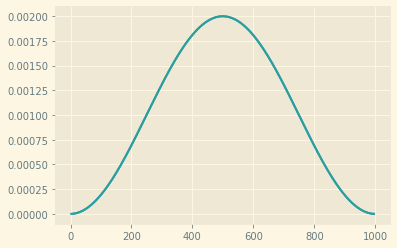

In [273]:
plt.plot(np.abs(cn@v.T)**2)
plt.plot(np.abs(v[:,0])**2)

---

In [303]:
def psi(e, v, psi_0, t):
    cn = get_coeffs(psi_0, v)
    return cn * np.exp(-1j * e * t[:,np.newaxis]) @ v.T
#     s = np.zeros_like(v[:,0])
#     for n in range(len(cn)):
#         s = s + cn[n]*np.exp(-1j*e[n]*t[:,np.newaxis])*v[:,n]
#     return s

In [276]:
x= np.linspace(0,1,N)

In [277]:
psi_0 = np.sqrt(2)*np.sin(np.pi*x)

In [294]:
t=  np.linspace(0,1)

In [304]:
PSI = psi(e, v, v[:,1], t)

C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


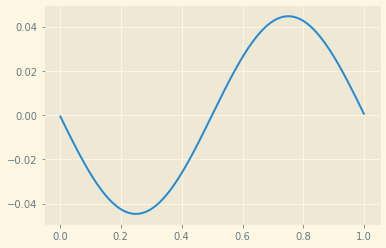

In [306]:
plt.plot(x, PSI[0])